In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# **Data Analysis**

In [2]:
data = pd.read_csv('/content/GoldPrice.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
data.shape

(2290, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# **Data Visualization**

In [11]:
cor = data.corr()

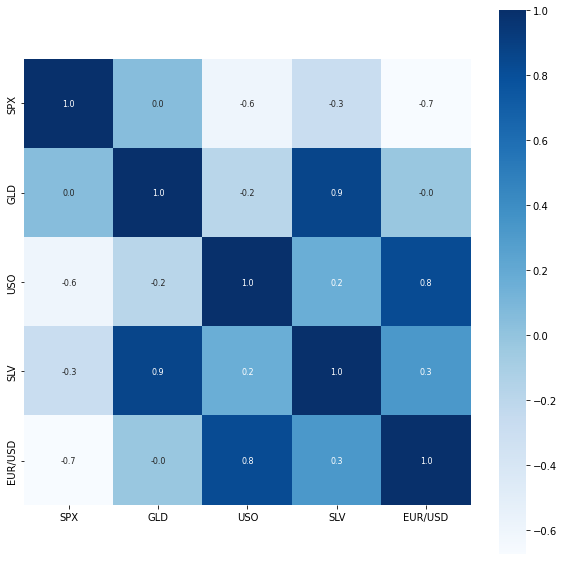

In [13]:
plt.figure(figsize = (10,10))
sns.heatmap(cor, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
cor['EUR/USD']

SPX       -0.672017
GLD       -0.024375
USO        0.829317
SLV        0.321631
EUR/USD    1.000000
Name: EUR/USD, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


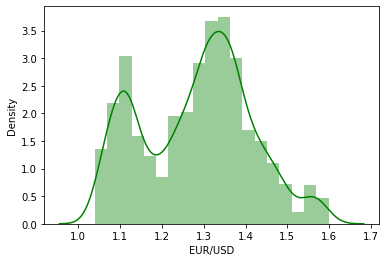

In [21]:
sns.distplot(data['EUR/USD'],color='green')

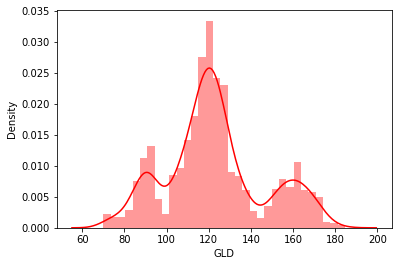

In [17]:
sns.distplot(data['GLD'],color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


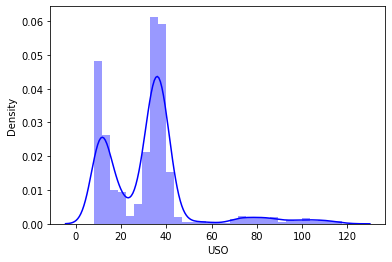

In [18]:
sns.distplot(data['USO'],color='blue')

# **Model Training**

In [35]:
X = data.drop(columns = ['EUR/USD','Date'], axis = 1)
Y = data['EUR/USD']

In [36]:
X

,SPX,GLD,USO,SLV
0,1447.160034,84.860001,78.470001,15.1800
1,1447.160034,85.570000,78.370003,15.2850
2,1411.630005,85.129997,77.309998,15.1670
3,1416.180054,84.769997,75.500000,15.0530
4,1390.189941,86.779999,76.059998,15.5900
...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100
2286,2697.790039,124.330002,14.370000,15.5300
2287,2723.070068,125.180000,14.410000,15.7400
2288,2730.129883,124.489998,14.380000,15.5600


In [37]:
Y

0       1.471692
1       1.474491
2       1.475492
3       1.468299
4       1.557099
          ...   
2285    1.186789
2286    1.184722
2287    1.191753
2288    1.193118
2289    1.182033
Name: EUR/USD, Length: 2290, dtype: float64

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [39]:
model = RandomForestRegressor(n_estimators = 100)

In [40]:
model.fit(X_train,Y_train)

RandomForestRegressor()

# **Model Evaluation**

In [41]:
pred = model.predict(X_train)
pred

array([1.35317149, 1.09143089, 1.44027949, ..., 1.337826  , 1.32905407,
       1.33092637])

In [43]:
acc = metrics.r2_score(pred, Y_train)
print('Training prediction:', acc)

Training prediction: 0.997466043680135


In [44]:
pred2 = model.predict(X_test)
pred2

array([1.31748963, 1.33185433, 1.27209137, 1.41829739, 1.29728776,
       1.32836306, 1.40948795, 1.07019479, 1.11172266, 1.23839116,
       1.42603041, 1.25646368, 1.2402836 , 1.04303333, 1.27253408,
       1.29201449, 1.42137389, 1.40979085, 1.21991401, 1.0808011 ,
       1.34738619, 1.23038939, 1.37226738, 1.28917129, 1.48729579,
       1.35451975, 1.44668985, 1.41217183, 1.09888355, 1.48358337,
       1.41198391, 1.48042828, 1.09693229, 1.23818333, 1.41730368,
       1.4011701 , 1.32831282, 1.41468207, 1.11653155, 1.35158197,
       1.18020829, 1.36117526, 1.47532799, 1.19544327, 1.09527045,
       1.31155993, 1.36207037, 1.57334551, 1.47916852, 1.12388381,
       1.38027926, 1.22963883, 1.48368256, 1.31741798, 1.16692483,
       1.29469752, 1.37867737, 1.10684559, 1.27158467, 1.46649386,
       1.35414104, 1.48499893, 1.38019172, 1.31940768, 1.30196768,
       1.344922  , 1.12315138, 1.29599125, 1.34420512, 1.30530352,
       1.35938281, 1.40856534, 1.26738417, 1.12402385, 1.56529

In [46]:
acc2 = metrics.r2_score(pred2, Y_test)
print('Testing prediction:', acc2)

Testing prediction: 0.975232320309215


Compare the Actual Values and Predicted Values in a Plot

In [47]:
Y_test = list(Y_test)

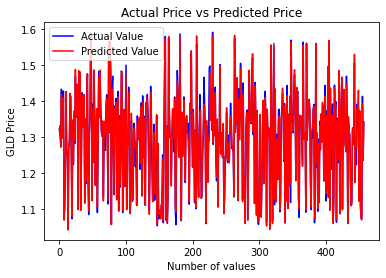

In [48]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(pred2, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()